### 1. Import data and libraries

In [25]:
import numpy as np
import pandas as pd
import os
import sys
import random
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
data = pd.read_csv("abalone_data.txt")
data.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [75]:
#check missing values
data.isnull().sum() 

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

def feature_extraction(train_dataset):
    #get useful features

def train(train_dataset):
    return

def test(test_dataset,predictor):
    return

train_orig_dataset,test_orig_dataset = read_dataset()
train_dataset = feature_extraction(train_orig_dataset)
predictor = train(train_dataset)

test_dataset = feature_extraction(test_orig_dataset)
test(test_dataset,predictor)

### 2. Explore the dataset

#### 2.1 Visulise correlation

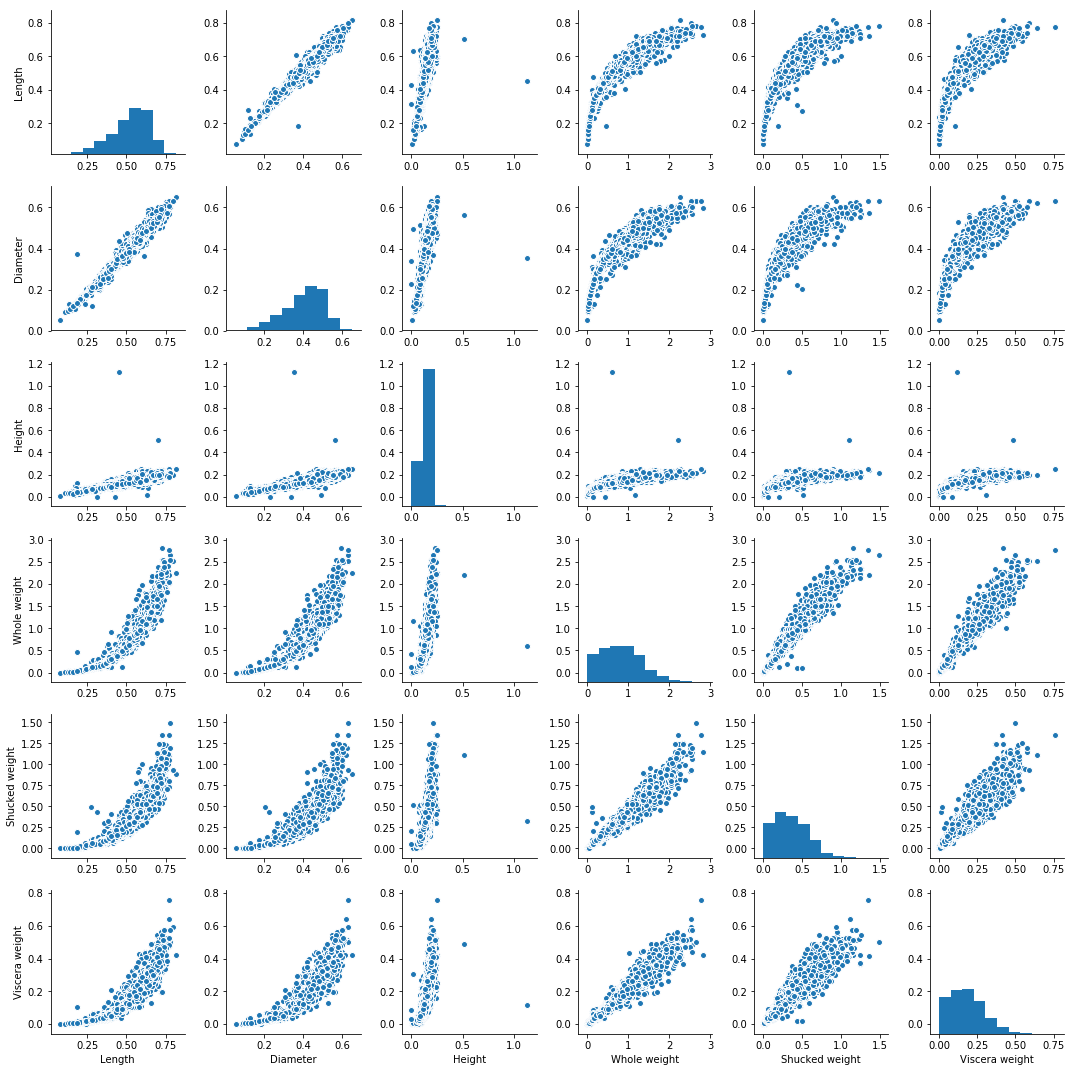

In [137]:
sns.pairplot(data.iloc[:,1:7])

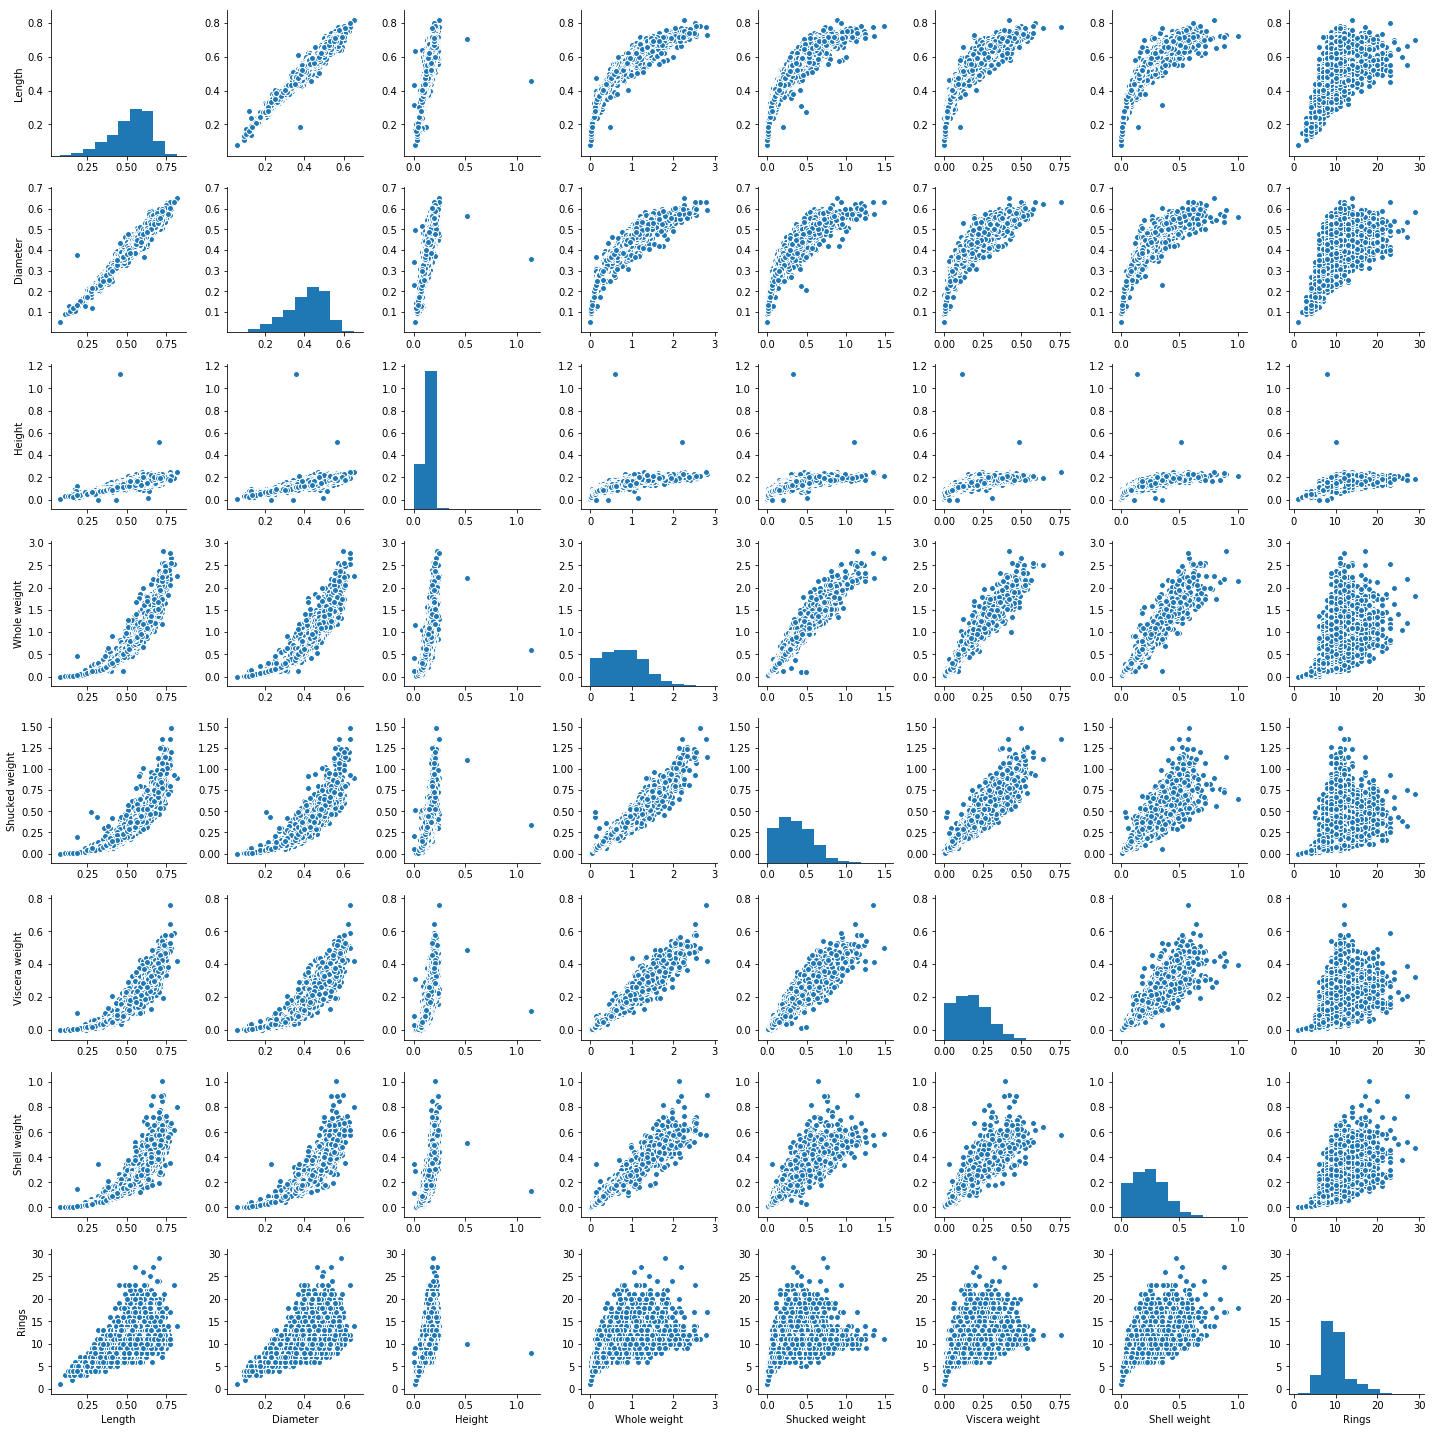

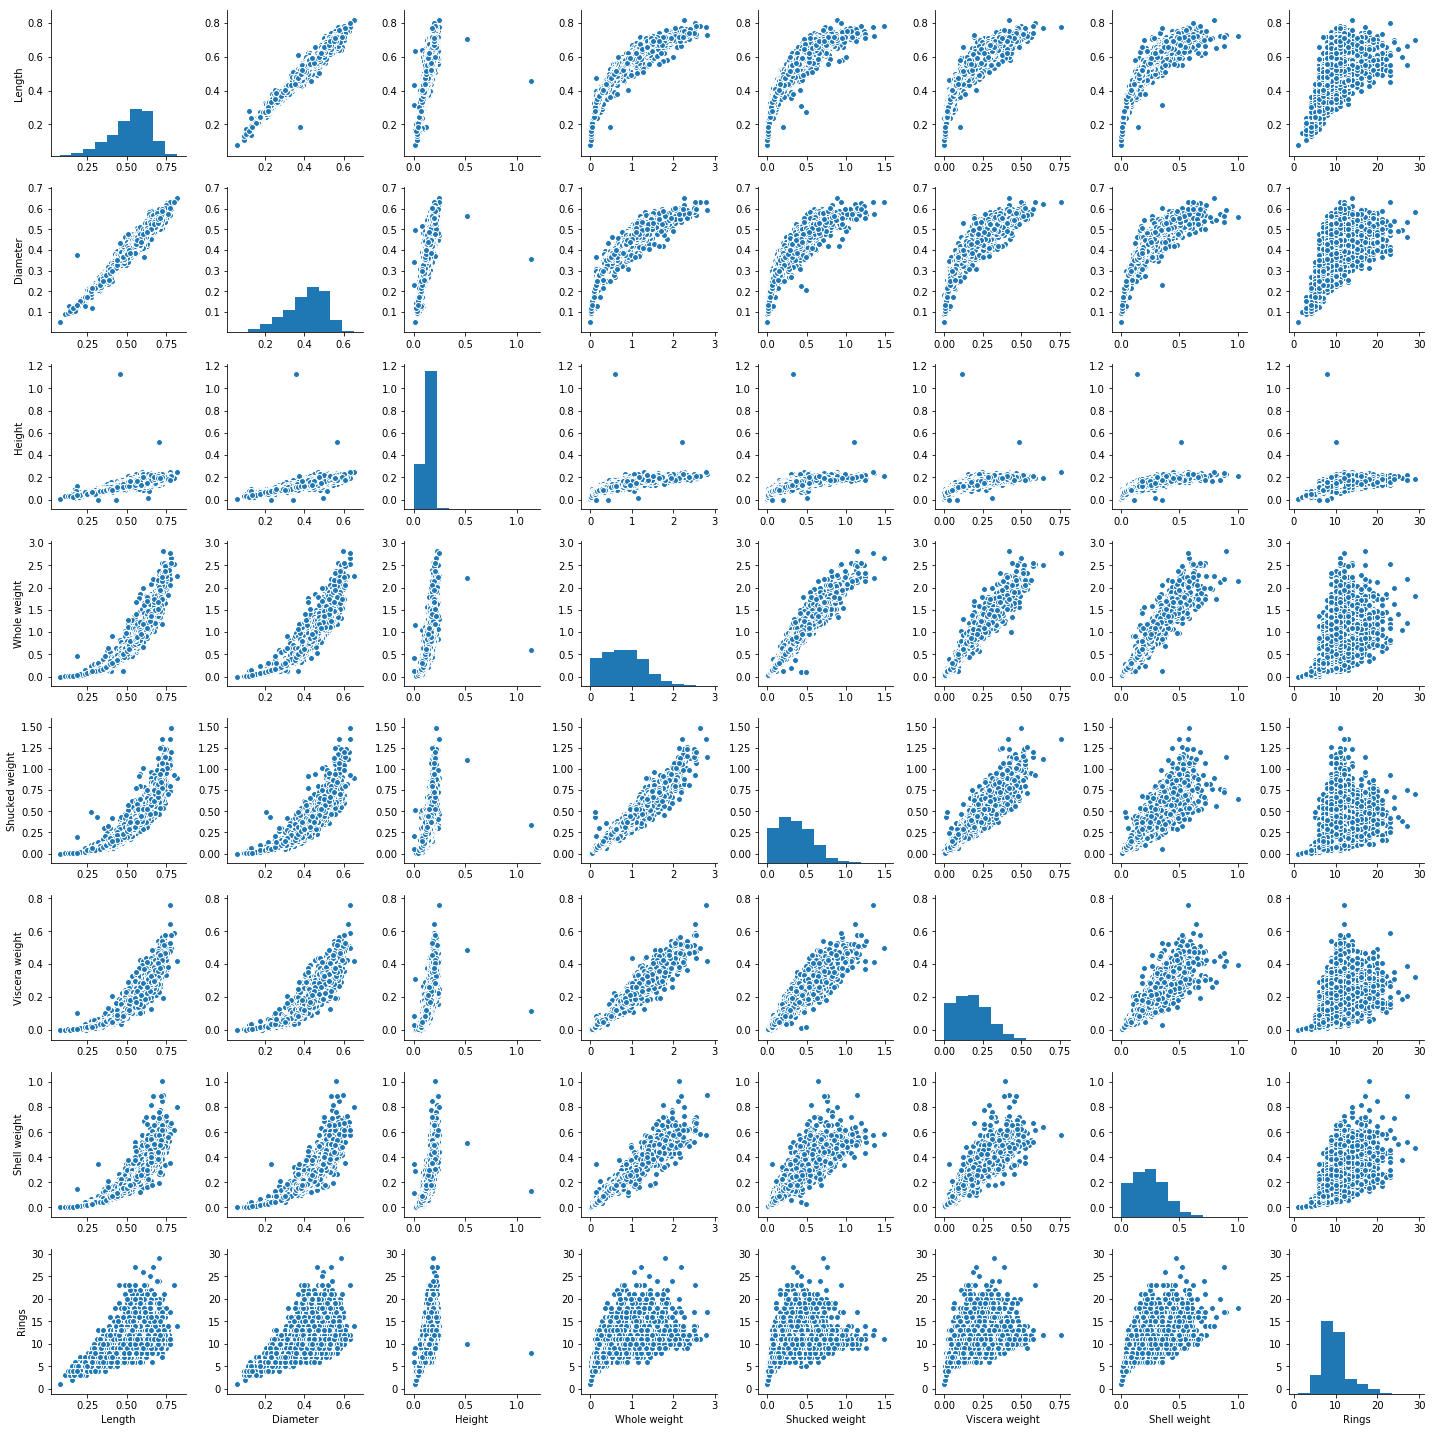

In [27]:
#Visualize pariwise correlation
sns.pairplot(data)
plt.show()
%matplotlib inline

In [38]:
# correlation
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


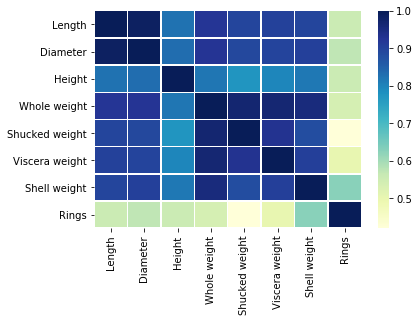

In [70]:
ax = sns.heatmap(data.corr(), linewidth=0.5,cbar=True,cmap="YlGnBu")
plt.figure(figsize = (12,7))
plt.show()

Serveral Observations from above plot & table:
1. Number of rings (age) is positive correlated with almost all the quantitative features. 
2. Many features are highly correlated, for example, length & diameter, length & all kinds of weight, length & height; whole weight & shucked weight, whole weight & viscera weight, whole weight &shell weight. It seems that length, diameter & whole weight are correlated with most of the other features. 

#### 2.2 Visulise distribution

In [28]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


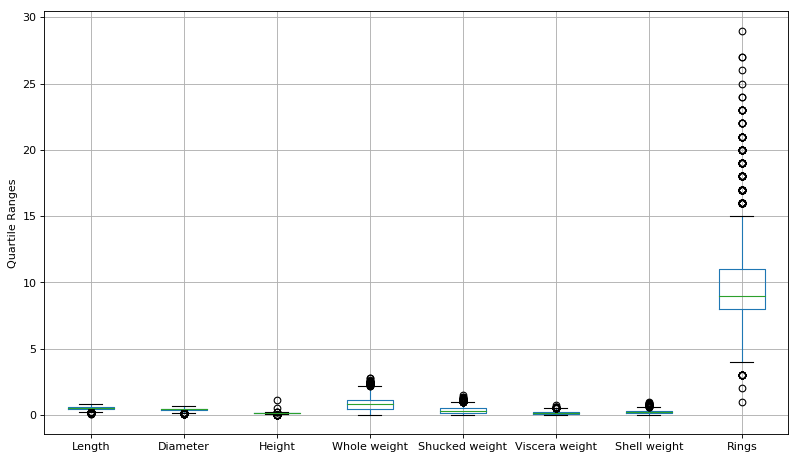

In [123]:
plt.figure(figsize=(12,7), dpi=80)
data.iloc[:,1:9].boxplot()
plt.ylabel(("Quartile Ranges"))
plt.show()

As we can see that the last column, rings, is out of the scale of the others, so plot again without it. 

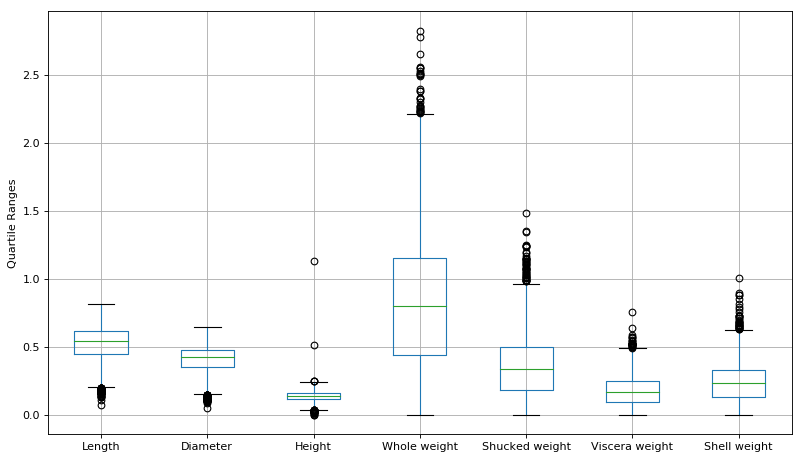

In [122]:
plt.figure(figsize=(12,7), dpi=80)
data.iloc[:,1:8].boxplot()
plt.ylabel(("Quartile Ranges"))
plt.show()

##### Take a look at of the distribution within each gender.

The distribution of Rings in the three genders:
       count       mean       std  min  25%   50%   75%   max
Sex                                                         
F    1307.0  11.129304  3.104256  5.0  9.0  10.0  12.0  29.0
I    1342.0   7.890462  2.511554  1.0  6.0   8.0   9.0  21.0
M    1528.0  10.705497  3.026349  3.0  9.0  10.0  12.0  27.0


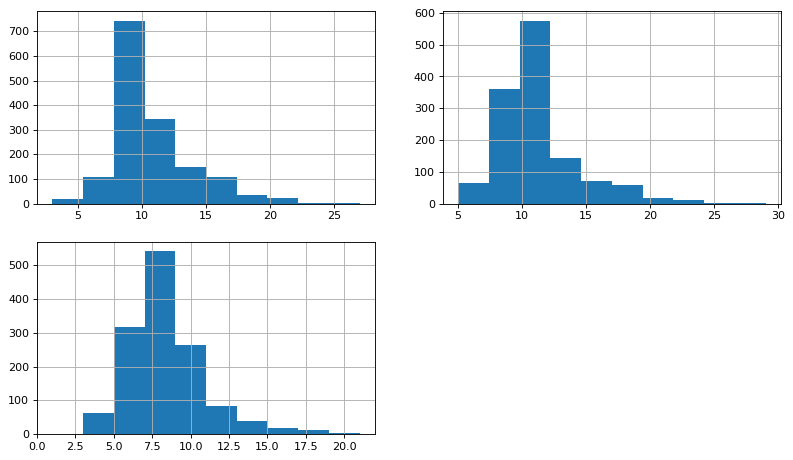

In [127]:
plt.figure(figsize=(12,7), dpi=80)
plt.subplot(2,2,1)
data.loc[data['Sex']=='M','Rings'].hist()
plt.subplot(2,2,2)
data.loc[data['Sex']=='F','Rings'].hist()
plt.subplot(2,2,3)
data.loc[data['Sex']=='I','Rings'].hist()
print("The distribution of Rings in the three genders:\n",data.groupby('Sex')["Rings"].describe())
plt.show()

We can see that the differences in distribution of Ring numbers in each category M, F & I.

In [68]:
# Count how many samples are in each sex group
data.groupby("Sex")['Sex'].count()

Sex
F    1307
I    1342
M    1528
Name: Sex, dtype: int64

### 3. Linear regression in scikit-learn

#### 3.1 Create Dummy variables for Sex column.

In [108]:
data_num = pd.get_dummies(data,drop_first=True)  #prefix=['M','F','I']
data_num.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


#### 3.2 split train - test dataset

In [115]:
from sklearn.cross_validation import train_test_split
feature_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Sex_I','Sex_M']
X = data_num[feature_cols]
y = data_num["Rings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [116]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3341, 9)
(3341,)
(836, 9)
(836,)


#### 3.3 train the regression model

In [117]:
# import model
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

3.84115008942
[ -0.96832151  12.06428788   9.65086771   8.74780088 -19.87162312
  -9.77673977   9.17927876  -0.78257361   0.06681888]


In [119]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('Length', -0.96832150802831107),
 ('Diameter', 12.06428787859886),
 ('Height', 9.6508677128120031),
 ('Whole weight', 8.7478008848814302),
 ('Shucked weight', -19.871623121423287),
 ('Viscera weight', -9.7767397730053638),
 ('Shell weight', 9.1792787646354945),
 ('Sex_I', -0.78257360546356847),
 ('Sex_M', 0.066818878388480371)]

#### 3.3 make prediction

In [120]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

### 4. Model evaluation metrics for regression

#### 4.1 Computing the MSE & RMSE for our Number of Rings predictions

In [231]:
# calculate MSE
from sklearn import metrics
print("MSE: %.2f"% metrics.mean_squared_error(y_test,y_pred))
print('R2: %.2f' % metrics.r2_score(y_test,y_pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 4.77
R2: 0.51
RMSE: 2.18


Observation: The R2 is relatively low. Only 51% of variance is explained. 
Linear regression is sensitive to correlated variables. I'll first try to remove some of the highly correlated ones. In this case, I'll only remain Sex_I, Sex_M, Diameter, 
Or, more non-linearality is needed. 

#### 4.2 Removing features with high correlation and not increasing much in RMSE

In [227]:
#After some exploration, I found that diameter and length can be dropped. 
feature_cols_2 = ["Sex_I","Sex_M","Whole weight","Shucked weight","Shell weight","Viscera weight","Height"] 
X_2 = data_num[feature_cols_2]
y_2 = data_num["Rings"]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=1)y

In [228]:
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(3341, 6)
(3341,)
(836, 6)
(836,)


In [230]:
# instantiate
linreg_2 = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train_2, y_train_2)
print(linreg.intercept_)
print(linreg.coef_)

# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

# make predictions on the testing set
y_pred_2 = linreg.predict(X_test_2)

#Model evaluation
print("MSE: %.2f"% metrics.mean_squared_error(y_test_2,y_pred_2))
print('R2: %.2f' % metrics.r2_score(y_test_2,y_pred_2))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test_2, y_pred_2)))

7.49321053768
[ -1.03651647e+00  -2.70670546e-03   9.20666918e+00  -1.86220615e+01
   1.31907418e+01  -7.42347724e+00]
MSE: 5.02
R2: 0.49
RMSE: 2.24


Observation: The linear regression is not a very good model for this dataset.

####  Try Lasso or elastic net

### KNN 

In [242]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=15)
# Fit the model on the training data.
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [243]:
# Compute the mean squared error of our predictions.
mse_knn = (((y_pred_knn - y_test) ** 2).sum()) / len(y_pred_knn)
print("MSE: %.2f"% mse_knn)

MSE: 4.73


#### Using cross-validation to select the best K (with lowest MSE)

In [259]:
from sklearn.cross_validation import KFold
m = len(X)  #total number of samples
kf = KFold(m, n_folds=5, shuffle=False)
for iteration, data in enumerate(kf, start=1):
    print(str(iteration)+"\n","Training set",data[0].shape,"Testing set",data[1].shape)

1
 Training set (3341,) Testing set (836,)
2
 Training set (3341,) Testing set (836,)
3
 Training set (3342,) Testing set (835,)
4
 Training set (3342,) Testing set (835,)
5
 Training set (3342,) Testing set (835,)


In [276]:
from sklearn.cross_validation import cross_val_score
k_range = list(range(1, 31))
k_mse = []
for k in k_range:
    #scores = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
    scores_k = []
    for iteration, data in enumerate(kf, start=1):
        knn = KNeighborsRegressor(n_neighbors = k)
        x_train_thisfold = X.iloc[data[0],:]
        y_train_thisfold = y[data[0]]
        x_test_thisfold = X.iloc[data[1],:]
        y_test_thisfold = y[data[1]]
        
        knn.fit(x_train_thisfold, y_train_thisfold)
        y_pred_thisfold = knn.predict(x_test_thisfold)
        scores_thisfold = metrics.mean_squared_error(y_test_thisfold,y_pred_thisfold)
        scores_k.append(scores_thisfold)
    k_mse.append(sum(scores_k)/float(len(scores_k)))
print(k_mse)

[8.4823370483912566, 6.6837309113829759, 5.8913891515215182, 5.6376478562014727, 5.4927698249434149, 5.3552405794471669, 5.3182206312889306, 5.2979888100593069, 5.2588272754508694, 5.2388776466206348, 5.220172314629707, 5.2208584306665777, 5.2334448285841049, 5.236031807101547, 5.2342963221881593, 5.2568715305632754, 5.2540353051616018, 5.2606053001210054, 5.2698834538110102, 5.2605398669168846, 5.2808027131623545, 5.2981160438030974, 5.3122117722207918, 5.3125948521617046, 5.3296731224250058, 5.3372505355925561, 5.3474886834125082, 5.3572354830179503, 5.3650140680356078, 5.3752773311431365]


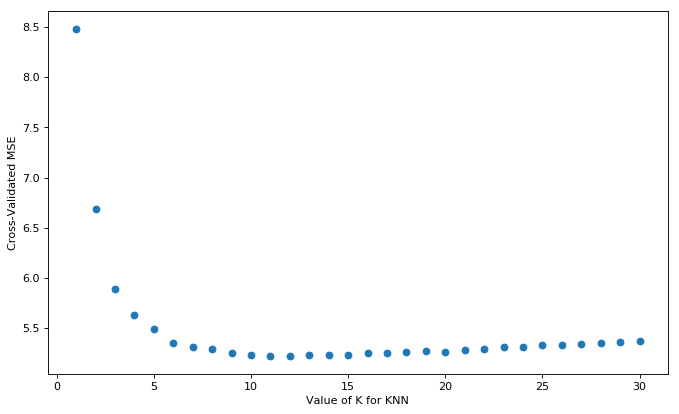

In [291]:
plt.figure(figsize=(10,6), dpi=80)
plt.scatter(x = k_range, y = k_mse)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

### Tree Regression

I guess 